<a href="https://colab.research.google.com/github/sidchaubey/Pratice_Python/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df_1 = df.drop(columns=["species"], axis=1)
df_1.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


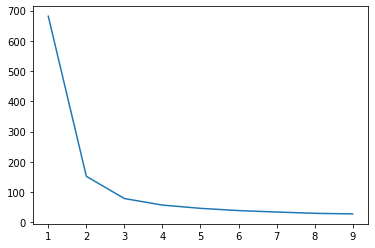

In [24]:

wcss = []
for i in range(1, 10):
  kmeans = KMeans(i, random_state=0)
  kmeans.fit(df_1)
  wcss.append(kmeans.inertia_)
plt.plot(np.arange(1, 10), wcss)
plt.show()

Initialization complete
Iteration  0, inertia 1852.590
Iteration  1, inertia 681.371
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.135618e-04
Initialization complete
Iteration  0, inertia 2026.750
Iteration  1, inertia 681.371
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.135618e-04
Initialization complete
Iteration  0, inertia 1800.490
Iteration  1, inertia 681.371
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.135618e-04
Initialization complete
Iteration  0, inertia 1396.930
Iteration  1, inertia 681.371
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.135618e-04
Initialization complete
Iteration  0, inertia 1799.170
Iteration  1, inertia 681.371
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.135618e-04
Initialization complete
Iteration  0, inertia 1748.990
Iteration  1, inertia 681.371
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.135618e-0

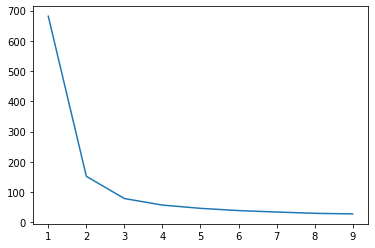

In [25]:

wcss = []
for i in range(1, 10):
  kmeans = KMeans(i, init="k-means++", verbose=3, max_iter=300, random_state=0);
  kmeans.fit(df_1)
  wcss.append(knn.inertia_)
plt.plot(np.arange(1, 10), wcss)
plt.show()

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 90.1899494949495
start iteration
done sorting
end inner loop
Iteration 1, inertia 81.94841987179487
start iteration
done sorting
end inner loop
Iteration 2, inertia 81.09073589435775
start iteration
done sorting
end inner loop
Iteration 3, inertia 80.226346215781
start iteration
done sorting
end inner loop
Iteration 4, inertia 79.59232190942473
start iteration
done sorting
end inner loop
Iteration 5, inertia 79.02616666666667
start iteration
done sorting
end inner loop
Iteration 6, inertia 78.8556658259773
start iteration
done sorting
end inner loop
Iteration 7, inertia 78.8556658259773
center shift 0.000000e+00 within tolerance 1.135618e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 79.44537500000001
start iteration
done sorting
end inner loop
Iteration 1, inertia 78.85144142614601
start iteration
done sorting
end inner loop
Iteration 2, inertia 78.851

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


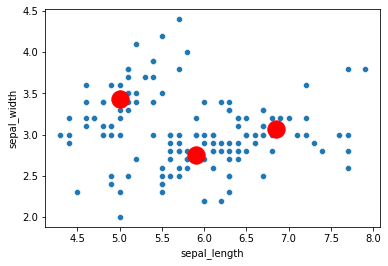

In [31]:
kmeans = KMeans(n_clusters=3, init="k-means++", verbose=3, random_state=0)
pred_labels = kmeans.fit_predict(df_1)
print(pred_labels)
sns.scatterplot(df_1.iloc[:, 0], df_1.iloc[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()



# kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
# pred_y = kmeans.fit_predict(X)
# plt.scatter(X[:,0], X[:,1])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
# plt.show(

In [18]:
lst = pred_labels.tolist()
lst.count(2)

62

In [23]:
pd.concat([df_1, pd.Series(pred_labels, name="pred"), df["species"]], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,pred,species
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,0,virginica
148,6.2,3.4,5.4,2.3,0,virginica
